In [113]:
import numpy as np

with open('./data/coef_model2.npy', 'rb') as f:
    coef = np.load(f)

coef_NKI = coef[:, 0]
coef_share = coef[:, 1]

In [114]:
import gzip
import pickle

filename = './data/slider_values.pkl.gz'

with gzip.open(filename, 'rb') as f:
    X_df = pickle.load(f)
    
filename = './data/outcomes.pkl.gz'

with gzip.open(filename, 'rb') as f:
    Y_df = pickle.load(f)

In [115]:
import ipywidgets as widgets

knowledge_init = X_df.loc['knowledge', 2019]
punctuality_init = X_df.loc['punctuality', 2019]
relevance_init = X_df.loc['relevance', 2019]
value_init = X_df.loc['value', 2019]

knowledge = widgets.FloatSlider(
    value=knowledge_init,
    min=knowledge_init - 0.1,
    max=knowledge_init + 0.1,
    step=0.01,
    description='knowledge',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

punctuality = widgets.FloatSlider(
    value=punctuality_init,
    min=punctuality_init - 0.1,
    max=punctuality_init + 0.1,
    step=0.01,
    description='punctuality',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

relevance = widgets.FloatSlider(
    value=relevance_init,
    min=relevance_init - 0.1,
    max=relevance_init + 0.1,
    step=0.01,
    description='relevance',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

value = widgets.FloatSlider(
    value=value_init,
    min=value_init - 0.1,
    max=value_init + 0.1,
    step=0.01,
    description='value',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# slider_layout = widgets.VBox([knowledge, punctuality, relevance, value])

In [116]:
# import bqplot.pyplot as plt
# import pandas as pd

# X = np.array([
# 1,
# knowledge.value,
# punctuality.value,
# relevance.value,
# value.value
# ])

# outputs = pd.DataFrame({
# 'outcomes':['NKI', 'market_share'],
# 'value':[round(X@coef_NKI, 3), round(X@coef_share, 3)]
# })

# title = f'''
# What-if\n
# original NKI = {Y_df.loc['Nöjd Kund Index (NKI) allmänheten', 2019]}, 
# original market share = {Y_df.loc['Kollektivtrafikens marknadsandel', 2019]}\n
# estimated NKI = {outputs.iloc[0,1]},
# estimated market share = {outputs.iloc[1,1]})
# '''

# fig = px.bar(outputs, x='outcomes', y='value',
#              width=500, height=300, range_y = [0, 0.8], text='value', title=title)

# <center>Example Dashboard</center>

In [117]:
from ipywidgets import interact, HBox, VBox, interactive_output
import pandas as pd
import plotly.express as px

y_df = Y_df.loc[['Nöjd Kund Index (NKI) allmänheten', 'Kollektivtrafikens marknadsandel'],:]
y_df.index = ['NKI', 'market_share']

data_df = pd.concat([X_df, y_df], axis=0).unstack().reset_index()
data_df.columns = ['year', 'variable', 'value']
data_df['type'] = (['driver']*4 + ['outcome']*2 )*10
data_df['value'] = data_df['value'].apply(lambda x:round(x, 2))

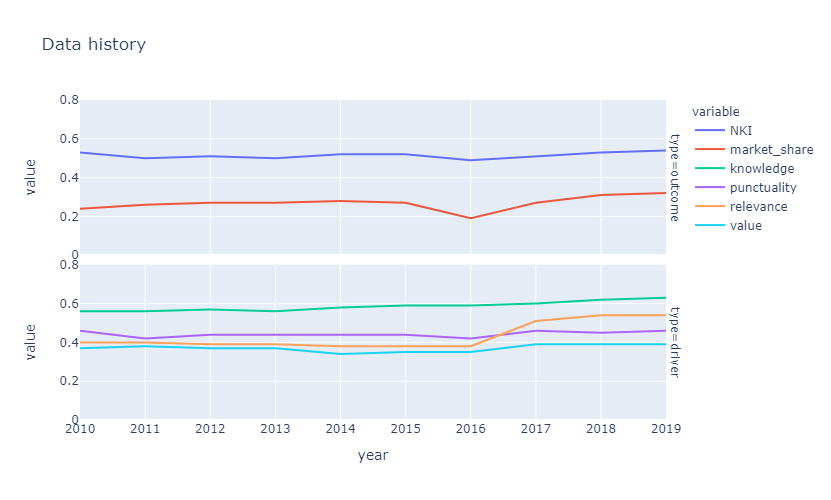

In [118]:
# fig = px.line(data_df, x='year', y='value', color='variable',
#               width=800, height=500, range_y = [0, 0.8], line_dash='type',
#               category_orders={'variable':['NKI', 'market_share', 'knowledge', 'punctuality', 'relevance', 'value'],
#                               'type':['outcome', 'driver']},
#               title='Data history')
fig = px.line(data_df, x='year', y='value', color='variable',
              width=800, height=500, range_y = [0, 0.8], facet_row='type',
              category_orders={'variable':['NKI', 'market_share', 'knowledge', 'punctuality', 'relevance', 'value'],
                              'type':['outcome', 'driver']},
              title='Data history')

fig.update_layout(xaxis = {'nticks':10})
fig.show()

In [119]:

def plot(knowledge, punctuality, relevance, value):
    X = np.array([
    1,
    knowledge,
    punctuality,
    relevance,
    value
    ])
    
    outputs = pd.DataFrame({
    'outcomes':['NKI', 'market_share'],
    'value':[round(X@coef_NKI, 3), round(X@coef_share, 3)]
    })
    
    fig = px.bar(outputs, x='outcomes', y='value',
                width=500, height=400, range_y = [0, 0.8], text='value',
                title='Estimated outcomes')

    return fig.show()

out = widgets.interactive_output(plot, 
                                 {'knowledge': knowledge, 'punctuality': punctuality, 'relevance': relevance, 'value':value})

layout = widgets.Layout(display='flex',
                flex_flow='raw',
                align_items='center',
                width='100%')
display(HBox([VBox([knowledge, punctuality, relevance, value]), out], layout=layout))

knowledge = For most trips I make, I know how to go with the company.

punctuality = I can trust that I will arrive on time with the company.

relevance = I can use the company for most trips I make.

value (for money) = It is affordable to travel with the company.

----

## Experimental function
### From goal of outcomes, inversely estimate drivers to be achieved.

In [120]:
NKI_init = y_df.loc['NKI', 2019]
share_init = y_df.loc['market_share', 2019]

NKI = widgets.FloatSlider(
    value=NKI_init,
    min=NKI_init - 0.1,
    max=NKI_init + 0.2,
    step=0.01,
    description='NKI',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

share = widgets.FloatSlider(
    value=share_init,
    min=share_init - 0.1,
    max=share_init + 0.1,
    step=0.01,
    description='market share',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

In [121]:

# def plot2(NKI, share):
#     y = np.array([
#     NKI,
#     share
#     ])

#     inv = np.linalg.inv(coef.T @ coef) @ coef.T

#     outputs = pd.DataFrame({
#     'drivers':['knowledge', 'punctuality', 'relevance', 'value'],
#     'value':(y@inv)[1:]
#     })
#     outputs['value'] = outputs['value'].apply(lambda x:round(x,3))
#     outputs['value'] = outputs['value'].apply(lambda x:min(x,1.0))
    
#     fig = px.bar(outputs, x='drivers', y='value',
#                 width=500, height=400, range_y = [0, 1.0], text='value',
#                 title='Drivers to be achieved')

#     return fig.show()

# out = widgets.interactive_output(plot2, 
#                                  {'NKI': NKI, 'share': share})

# layout = widgets.Layout(display='flex',
#                 flex_flow='raw',
#                 align_items='center',
#                 width='100%')
# display(HBox([VBox([NKI, share]), out], layout=layout))

In [134]:
# Solve quadratic programming to find NKI and market_share, subject to the given driver values.

from scipy import optimize

def loss(x):
    X = x - np.array([1, knowledge_init, punctuality_init, relevance_init, value_init])
    return 0.5 * (X.T @ X)

def jac(x):
    X = x - np.array([1, knowledge_init, punctuality_init, relevance_init, value_init])
    return X

x0 = np.array([1, knowledge_init, punctuality_init, relevance_init, value_init])

def solve(y):
    cons = {'type':'ineq',
            'fun':lambda x: coef.T @ x - y,
            'jac':lambda x: coef.T}
    res = optimize.minimize(loss, x0, jac=jac, constraints=cons, method='SLSQP')
    return res['x']

def plot2(NKI, share):
    y = np.array([
    NKI,
    share
    ])

    x = solve(y)

    outputs = pd.DataFrame({
    'drivers':['knowledge', 'punctuality', 'relevance', 'value'],
    'value':x[1:]
    })
    outputs['value'] = outputs['value'].apply(lambda x:round(x,3))
    outputs['value'] = outputs['value'].apply(lambda x:min(x,1.0))
    
    fig = px.bar(outputs, x='drivers', y='value',
                width=500, height=400, range_y = [0, 1.0], text='value',
                title='Drivers to be achieved')

    return fig.show()

out = widgets.interactive_output(plot2, 
                                 {'NKI': NKI, 'share': share})

layout = widgets.Layout(display='flex',
                flex_flow='raw',
                align_items='center',
                width='100%')
display(HBox([VBox([NKI, share]), out], layout=layout))

----

## Model for all PTAs

### Estimation of NKI

In [123]:
import gzip
import pickle

with open('./data/coef_NKI_model3.npy', 'rb') as f:
    coef2 = np.load(f)

with open('./data/coef_share_model3.npy', 'rb') as f:
    coef3 = np.load(f)

with gzip.open('./data/NKI_PTAs_df.pkl.gz', 'rb') as f:
    df1 = pickle.load(f)

with gzip.open('./data/share_PTAs_df.pkl.gz', 'rb') as f:
    df2 = pickle.load(f)

with gzip.open('./data/sliders_df.pkl.gz', 'rb') as f:
    df3 = pickle.load(f)

with gzip.open('./data/weights_df.pkl.gz', 'rb') as f:
    df4 = pickle.load(f)

In [124]:
import pandas as pd

a = coef2[-4:].reshape(-1,1)
b = coef2[:-4]
pred = df1.sort_values(by=['year', 'PTA']).copy().drop(columns='Allmänheten')
pred['Kunder'] = 0
tmp = []
for year in [2019, 2018, 2017]:
    x = df3[df3['year']==year].sort_values(by='name')[df3.columns[1:-3]].values
    w = df4[df4['year']==year].sort_values(by='PTA')[df4.columns[1:-2]].values
    tmp += list(b + w@np.sum(a*x, axis=0))
    
pred['Kunder'] = tmp
pred['Kunder'] = pred['Kunder'].apply(lambda x:round(x, 3))

In [125]:
tmp1 = df1[['PTA', 'year', 'Kunder']].sort_values(by=['year', 'PTA']).copy()
tmp1['type'] = 'recorded'

tmp2 = pred[['PTA', 'year', 'Kunder']].copy()
tmp2['type'] = 'estimated'

concat_df = pd.concat([tmp1,tmp2], axis=0)

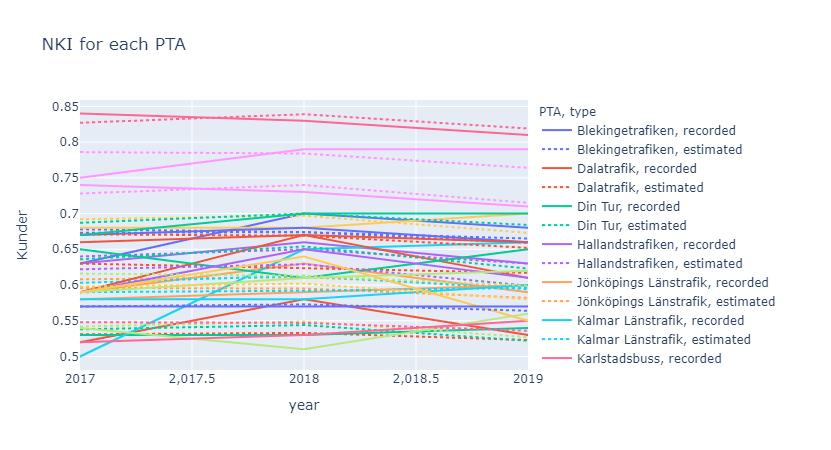

In [126]:
fig = px.line(concat_df, x='year', y='Kunder', color='PTA', title='NKI for each PTA',
             line_dash='type',)
fig.show()

In [127]:
import ipywidgets as widgets

punctuality_init2 = df3[(df3['year']==2019) & (df3['name']=='Kvalitet/punktlighet')]['Kollektivtrafikresenärer ']
value_init2 = df3[(df3['year']==2019) & (df3['name']=='Prisvärdhet')]['Kollektivtrafikresenärer ']
relevance_init2 = df3[(df3['year']==2019) & (df3['name']=='Relevans ')]['Kollektivtrafikresenärer ']
safety_init2 = df3[(df3['year']==2019) & (df3['name']=='Trygghet')]['Kollektivtrafikresenärer ']

punctuality = widgets.FloatSlider(
    value=punctuality_init2,
    min=punctuality_init2 - 0.1,
    max=punctuality_init2 + 0.1,
    step=0.01,
    description='punctuality',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

value = widgets.FloatSlider(
    value=value_init2,
    min=value_init2 - 0.1,
    max=value_init2 + 0.1,
    step=0.01,
    description='value',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

relevance = widgets.FloatSlider(
    value=relevance_init2,
    min=relevance_init2 - 0.1,
    max=relevance_init2 + 0.1,
    step=0.01,
    description='relevance',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

safety = widgets.FloatSlider(
    value=safety_init2,
    min=safety_init2 - 0.1,
    max=safety_init2 + 0.1,
    step=0.01,
    description='safety',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

In [136]:
import pandas as pd
from ipywidgets import interact, HBox, VBox, interactive_output

x = df3[df3['year']==2019].sort_values(by='name')[df3.columns[1:-3]].values
a = coef2[-4:].reshape(-1,1)
b = coef2[:-4]
w = df4[df4['year']==2019].sort_values(by='PTA')[df4.columns[1:-2]].values
tmp = df1.sort_values(by=['year', 'PTA']).copy().drop(columns='Allmänheten')

def plot3(punctuality, value, relevance, safety):
    X = np.empty((4,3))
    X[:,2] = np.array([punctuality, value, relevance, safety])
    X[:,1] = (x[:,1]/x[:,2])*X[:,2]
    X[:,0] = (x[:,0]/x[:,2])*X[:,2]
    
    outputs = pd.DataFrame({
    'PTA':tmp[tmp['year']==2019]['PTA'],
    'value':b + w@np.sum(a*X, axis=0)
    })
    outputs['value'] = outputs['value'].apply(lambda x:round(x, 3))
    outputs = outputs.sort_values('value', 
#                                   ascending=False
                                 )
    
    fig = px.bar(outputs, x='value', y='PTA',
                width=500, height=700, range_x = [0, 1.0], text='value',
                 orientation = 'h',
#                  color='PTA',
                title='Estimated NKI')
    fig.update_layout(showlegend=False)

    return fig.show()

out = widgets.interactive_output(plot3, 
                                 {'punctuality': punctuality, 'value':value, 'relevance': relevance, 'safety': safety})

layout = widgets.Layout(display='flex',
                flex_flow='raw',
                align_items='center',
                width='100%')
display(HBox([VBox([punctuality, value, relevance, safety]), out], layout=layout))

### Estimation of market share

In [137]:
import pandas as pd

a2 = coef3[-4:].reshape(-1,1)
b2 = coef3[:-4]
pred2 = df2.sort_values(by=['year', 'PTA']).copy()
pred2['market_share'] = 0
tmp = []
for year in [2019, 2018, 2017]:
    x = df3[df3['year']==year].sort_values(by='name')[df3.columns[1:-3]].values
    w = df4[df4['year']==year].sort_values(by='PTA')[df4.columns[1:-2]].values
    tmp += list(b2 + w@np.sum(a2*x, axis=0))
    
pred2['market_share'] = tmp
pred2['market_share'] = pred2['market_share'].apply(lambda x:round(x, 3))

In [138]:
tmp1 = df2[['PTA', 'year', 'market_share']].sort_values(by=['year', 'PTA']).copy()
tmp1['type'] = 'recorded'

tmp2 = pred2[['PTA', 'year', 'market_share']].copy()
tmp2['type'] = 'estimated'

concat_df2 = pd.concat([tmp1,tmp2], axis=0)

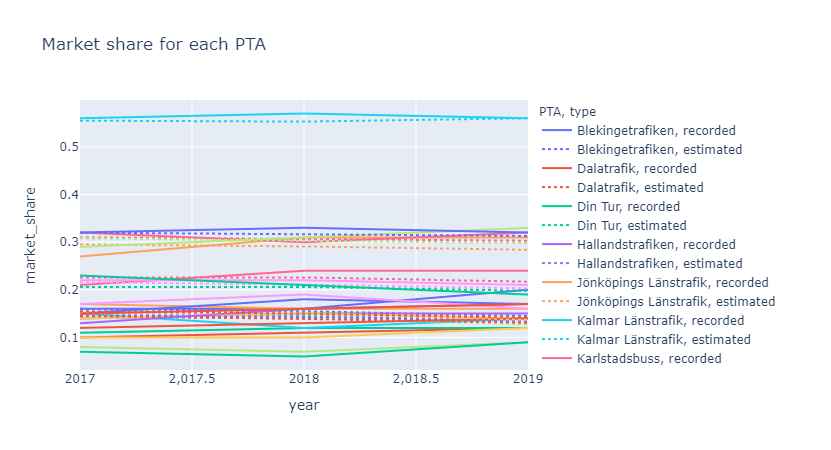

In [139]:
fig = px.line(concat_df2, x='year', y='market_share', color='PTA', title='Market share for each PTA',
             line_dash='type',)
fig.show()

In [140]:
import ipywidgets as widgets

punctuality2 = widgets.FloatSlider(
    value=punctuality_init2,
    min=punctuality_init2 - 0.1,
    max=punctuality_init2 + 0.1,
    step=0.01,
    description='punctuality',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

value2 = widgets.FloatSlider(
    value=value_init2,
    min=value_init2 - 0.1,
    max=value_init2 + 0.1,
    step=0.01,
    description='value',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

relevance2 = widgets.FloatSlider(
    value=relevance_init2,
    min=relevance_init2 - 0.1,
    max=relevance_init2 + 0.1,
    step=0.01,
    description='relevance',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

safety2 = widgets.FloatSlider(
    value=safety_init2,
    min=safety_init2 - 0.1,
    max=safety_init2 + 0.1,
    step=0.01,
    description='safety',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

In [141]:
import pandas as pd
from ipywidgets import interact, HBox, VBox, interactive_output

x = df3[df3['year']==2019].sort_values(by='name')[df3.columns[1:-3]].values
a2 = coef3[-4:].reshape(-1,1)
b2 = coef3[:-4]
w = df4[df4['year']==2019].sort_values(by='PTA')[df4.columns[1:-2]].values
tmp = df2.sort_values(by=['year', 'PTA']).copy()

def plot4(punctuality, value, relevance, safety):
    X = np.empty((4,3))
    X[:,2] = np.array([punctuality, value, relevance, safety])
    X[:,1] = (x[:,1]/x[:,2])*X[:,2]
    X[:,0] = (x[:,0]/x[:,2])*X[:,2]
    
    outputs = pd.DataFrame({
    'PTA':tmp[tmp['year']==2019]['PTA'],
    'value':b2 + w@np.sum(a2*X, axis=0)
    })
    outputs['value'] = outputs['value'].apply(lambda x:round(x, 3))
    outputs = outputs.sort_values('value', 
#                                   ascending=False
                                 )
    
    fig = px.bar(outputs, x='value', y='PTA',
                width=500, height=700, range_x = [0, 1.0], text='value',
                 orientation = 'h',
#                  color='PTA',
                title='Estimated market share')
    fig.update_layout(showlegend=False)

    return fig.show()

out = widgets.interactive_output(plot4, 
                                 {'punctuality': punctuality2, 'value':value2, 'relevance': relevance2, 'safety': safety2})

layout = widgets.Layout(display='flex',
                flex_flow='raw',
                align_items='center',
                width='100%')
display(HBox([VBox([punctuality2, value2, relevance2, safety2]), out], layout=layout))